In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

import time

In [3]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [4]:
# super parameters
batch_size = 10
train_set_size = 10000
img_size = 28*28

In [5]:
# data preperation
root = './datasets/'
download = False
transform = torchvision.transforms.ToTensor()
train_set = torchvision.datasets.MNIST(root,train = True,download=download, transform = transform)
test_set = torchvision.datasets.MNIST(root,train = False,download=download, transform = transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=train_set_size) # load everything
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

In [6]:
class Net(torch.nn.Module):
    def __init__(self, train):
        super(Net,self).__init__()
        self.train_images, self.train_labels = train
        self.train_images = (self.train_images.numpy()
                                ).reshape([train_set_size,img_size])
        #self.train_labels = np.array(self.train_labels.numpy(),dtype="int8")
        
    def forward(self,imgs):
        imgs = imgs.numpy().reshape([batch_size,img_size])
        predict_labels = np.zeros(batch_size)
        for i, img in enumerate(imgs):
            diffs = abs((img - self.train_images)).sum(1)
            predict_labels[i] = self.train_labels[np.argmin(diffs)]
        return predict_labels


# the training is built-in the model initialization
net = Net(iter(train_loader).next())

Actual number:  [7 2 1 0 4 1 4 9 5 9]
Predict number:  [7 2 1 0 9 1 9 9 5 9]
Accuracy: 80.000000%


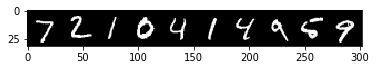

In [7]:
# Prediction Demo: one step
count = batch_size
correct = 0

testiter = iter(test_loader)
test_imgs, test_label = testiter.next()
test_label = test_label.numpy()

out_label = net(test_imgs)
out_label = np.array(out_label,dtype="int8")

correct = (out_label==test_label).sum()


imgs = torchvision.utils.make_grid(torch.Tensor(test_imgs),nrow=10)
imshow(imgs)

print("Actual number: ", test_label)
print("Predict number: ", out_label)
print("Accuracy: {:2%}".format(correct/count))

In [8]:
# Model evaluation
tic = time.time()
count = 0
correct = 0
for data in test_loader:
    test_imgs, test_label = data
    test_label = test_label.numpy()
    
    out_label = net(test_imgs)
    
    count = count + batch_size
    correct = correct + (out_label==test_label).sum()

print("Done!")
print("Duration: {}s".format(round(time.time()-tic)))
print("Accuracy: {:2%}".format(correct/count))

Done!
Spend 76 s
93.670000%
